# Feature Selection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv("../Datasets/Companies/SmallCompanies.csv")

df.head()

,unique_id,disbursement_date,loan_investment_amount,lender_insurance_premium,metro_type,LMI_type,revenue,full_time_employees,naics_code,jobs_created,lender_type_category,optional_primary_use_of_funds,optional_revenue_yr_confirmed,optional_stage,active_status,support_amount
0,AK_2013_VCP_1,3/1/2013,180000.0,0.0,Metro,Non-LMI,0.0,5.0,541511,3.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0
1,AK_2013_VCP_3,12/30/2013,265000.0,0.0,Metro,Non-LMI,0.0,7.0,541511,2.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0
2,AK_2014_VCP_1,4/11/2014,199500.0,0.0,Metro,Non-LMI,0.0,2.0,336612,8.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0
3,AK_2014_VCP_2,5/15/2014,125000.0,0.0,Metro,LMI,1494916.0,8.0,451110,8.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0
4,AK_2014_VCP_3,9/15/2014,120000.0,0.0,Metro,Non-LMI,41000.0,0.0,336612,0.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0


In [3]:
print("Dataset dimensions:", df.shape)

Dataset dimensions: (18584, 16)


In [4]:
# Get concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18584 entries, 0 to 18583
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unique_id                      18584 non-null  object 
 1   disbursement_date              18584 non-null  object 
 2   loan_investment_amount         18584 non-null  float64
 3   lender_insurance_premium       18584 non-null  float64
 4   metro_type                     18584 non-null  object 
 5   LMI_type                       18584 non-null  object 
 6   revenue                        18584 non-null  float64
 7   full_time_employees            18584 non-null  float64
 8   naics_code                     18584 non-null  int64  
 9   jobs_created                   18584 non-null  float64
 10  lender_type_category           18584 non-null  object 
 11  optional_primary_use_of_funds  18584 non-null  object 
 12  optional_revenue_yr_confirmed  18584 non-null 

In [5]:
# Filter out the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate the number of unique values for each categorical column
unique_counts_categorical = df[categorical_columns].nunique()

unique_counts_categorical

unique_id                        18563
disbursement_date                 1572
metro_type                           2
LMI_type                             2
lender_type_category                 6
optional_primary_use_of_funds        5
optional_stage                       5
active_status                       10
dtype: int64

In [6]:
df=df[df['active_status']!='Unknown']

In [7]:
different_active_statuses = df['active_status'].unique()

print(different_active_statuses)

['Did not attempt to confirm operations' 'Yes'
 'Attempted to confirm operations, but unable' 'Other' 'Sold' 'Exit'
 'Loss' 'Bankrupt' 'Moved']


## Encoding

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4050 entries, 778 to 18583
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unique_id                      4050 non-null   object 
 1   disbursement_date              4050 non-null   object 
 2   loan_investment_amount         4050 non-null   float64
 3   lender_insurance_premium       4050 non-null   float64
 4   metro_type                     4050 non-null   object 
 5   LMI_type                       4050 non-null   object 
 6   revenue                        4050 non-null   float64
 7   full_time_employees            4050 non-null   float64
 8   naics_code                     4050 non-null   int64  
 9   jobs_created                   4050 non-null   float64
 10  lender_type_category           4050 non-null   object 
 11  optional_primary_use_of_funds  4050 non-null   object 
 12  optional_revenue_yr_confirmed  4050 non-null   flo

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

label_encoder = LabelEncoder()

# Encode 'active_status' column
df['active_status'] = df['active_status'].apply(lambda x: 1 if x == 'Yes' else 0)

# Get the list of categorical columns excluding 'active_status'
categorical_columns = [col for col in df.select_dtypes(include=['object']) if col != 'active_status']

# Apply one-hot encoding to remaining categorical columns
df = pd.get_dummies(df, columns=categorical_columns)

# Print the encoded DataFrame
print(df.head())


     loan_investment_amount  lender_insurance_premium     revenue  \
778                100000.0                       0.0  2027806.00   
800                240000.0                       0.0  1662422.00   
802                282000.0                       0.0   268058.00   
832                 50000.0                       0.0   254153.58   
847                 21500.0                       0.0        0.00   

     full_time_employees  naics_code  jobs_created  \
778                 12.0      541330           0.0   
800                  2.0      238220           0.0   
802                 11.0      722511           1.0   
832                  4.0      487210           0.0   
847                  1.0      453310           0.0   

     optional_revenue_yr_confirmed  active_status  support_amount  \
778                         2014.0              0         80000.0   
800                         2014.0              0        180000.0   
802                         2014.0              0    

In [10]:
different_active_statuses = df['active_status'].unique()

print(different_active_statuses)

[0 1]


## Standardization

In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

scaled_df.head()

,loan_investment_amount,lender_insurance_premium,revenue,full_time_employees,naics_code,jobs_created,optional_revenue_yr_confirmed,active_status,support_amount,unique_id_CA_2011_LGP_103,...,optional_primary_use_of_funds_Fund Construction Costs,optional_primary_use_of_funds_Purchase Equipment,optional_primary_use_of_funds_Purchase Real Estate,optional_primary_use_of_funds_Refinance,"optional_primary_use_of_funds_Wages, Working Capital, & Professional Services",optional_stage_Early Stage,optional_stage_Growth,optional_stage_Mezzanine,optional_stage_Pre-Seed,optional_stage_Seed
0,-0.315060,-0.198289,0.035271,2.041887,0.174757,-0.396519,-0.43048,-1.204813,0.134016,-0.015715,...,-0.21754,-0.322247,-0.281312,-0.162345,0.559289,0.3451,-0.124686,-0.058896,-0.173234,-0.249311
1,-0.208173,-0.198289,0.020824,-0.558458,-1.671985,-0.396519,-0.43048,-1.204813,0.664893,-0.015715,...,-0.21754,-0.322247,-0.281312,-0.162345,0.559289,0.3451,-0.124686,-0.058896,-0.173234,-0.249311
2,-0.176107,-0.198289,-0.034310,1.781853,1.278630,-0.313751,-0.43048,-1.204813,0.906973,-0.015715,...,-0.21754,-0.322247,-0.281312,-0.162345,0.559289,0.3451,-0.124686,-0.058896,-0.173234,-0.249311
3,-0.353234,-0.198289,-0.034859,-0.038389,-0.154977,-0.396519,-0.43048,-1.204813,-0.157967,-0.015715,...,-0.21754,-0.322247,-0.281312,-0.162345,0.559289,0.3451,-0.124686,-0.058896,-0.173234,-0.249311
4,-0.374993,-0.198289,-0.044909,-0.818492,-0.361517,-0.396519,-0.43048,-1.204813,-0.199375,-0.015715,...,-0.21754,-0.322247,-0.281312,-0.162345,0.559289,0.3451,-0.124686,-0.058896,-0.173234,-0.249311


## PCA

In [12]:
from sklearn.decomposition import PCA

# Initialize PCA with the number of components you want
pca = PCA(n_components=16)

# Fit PCA to the scaled data
pca.fit(scaled_df)

# Transform the data to the new feature space
transformed_data = pca.transform(scaled_df)

# Convert the transformed data to a DataFrame
selected_features = pd.DataFrame(transformed_data, columns=[f'PC{i}' for i in range(1, 17)])


selected_features



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-1.437027,-3.418372,-1.379148,1.882333,0.191268,1.484586,-0.710048,-3.089962,-3.139258,-1.437109,0.842420,-1.249706,2.897718,-3.352370,-0.700169,2.132299
1,-0.630462,-2.707824,3.146136,1.606038,-1.649217,-0.628014,0.790286,1.388432,-0.317650,2.451948,-3.859549,-2.273584,-2.267268,-2.503810,-1.262785,-1.617753
2,-1.047861,-2.842335,2.638151,3.094049,0.452674,0.410724,-0.243921,-2.377373,-2.586697,2.592855,1.075176,-0.106671,3.298834,0.000269,1.509066,-0.359227
3,-0.396102,-2.745675,-1.041389,-2.019172,1.455884,-1.292851,1.392847,2.041477,0.764542,-1.665174,-1.606842,0.995119,1.942815,0.362902,-0.236750,-2.158057
4,-1.106435,-2.790637,-2.572012,0.092984,-0.214068,1.012321,-1.419708,-2.109466,0.334509,0.243487,0.847701,-0.721139,-2.959761,0.543811,-3.222054,-2.921531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,-1.395167,3.205079,3.700531,2.580609,4.698059,1.412716,-1.491651,-0.329849,2.229059,1.675431,1.316943,0.828010,2.718314,2.479495,3.055972,-0.991194
4046,-2.308987,2.051376,0.400822,1.187008,-0.635481,2.982679,3.852670,-0.056898,-3.759593,0.031776,0.554936,3.146006,-4.103345,0.637262,-2.923209,2.049478
4047,-2.769532,3.553822,3.268274,1.330109,-0.312338,-1.216176,0.028890,-1.370785,-1.249536,0.104621,-0.373503,-1.263132,0.490224,0.712862,-0.480479,0.673008
4048,-1.521387,2.212503,-0.808447,-0.259225,-0.162023,3.633603,-2.581907,0.269526,-0.984006,1.091487,-1.399903,1.097659,-2.024561,0.064442,2.166377,-2.237489


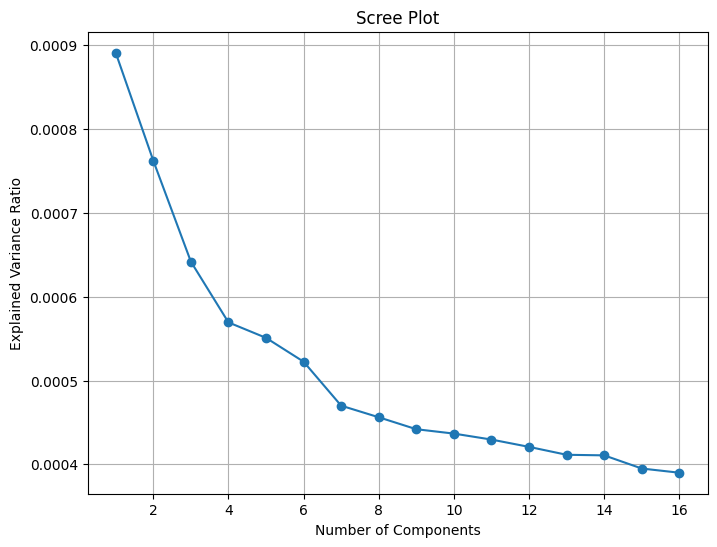

In [13]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

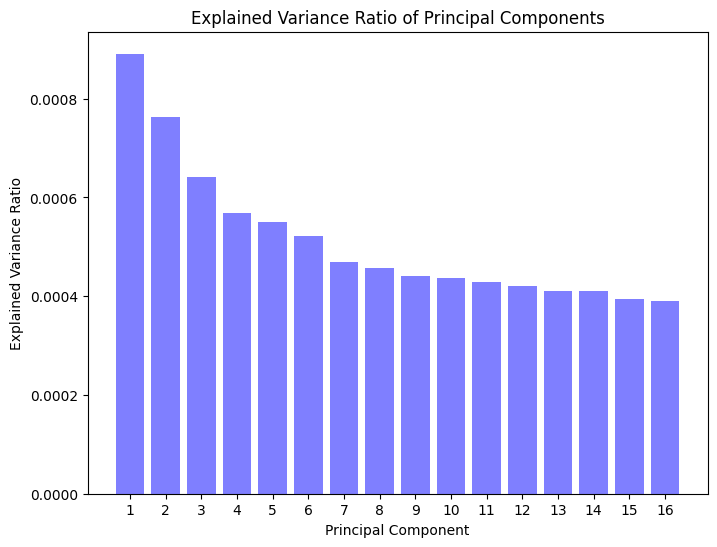

In [14]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, color='blue', alpha=0.5)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(range(1, pca.n_components_ + 1))
plt.show()


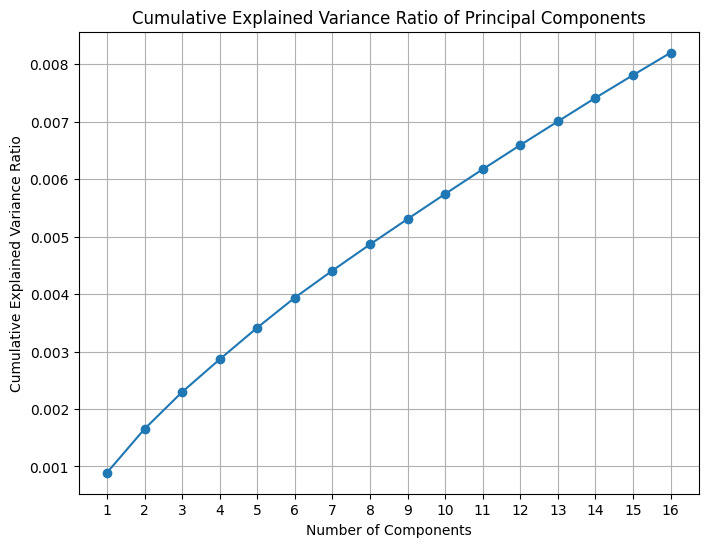

In [15]:

# Assuming pca is your PCA object
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio of Principal Components')
plt.xticks(range(1, len(explained_variance_ratio_cumulative) + 1))
plt.grid(True)
plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import itertools

# Split your data into features (X) and target variable (y)
X = scaled_df.drop(columns=['active_status'])  # Assuming 'active_status' is the target variable
y = scaled_df['active_status']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List to store results
results = []

# Loop through all possible combinations of features
for r in range(1, 4):  # considering combinations of 1 to 3 features
    feature_combinations = list(itertools.combinations(X.columns, r))
    for features in feature_combinations:
        # Linear Regression
        lr_model = LinearRegression()
        lr_model.fit(X_train[list(features)], y_train)
        lr_pred = lr_model.predict(X_test[list(features)])
        lr_rmse = mean_squared_error(y_test, lr_pred, squared=False)

        # Random Forest Regression
        rf_model = RandomForestRegressor()
        rf_model.fit(X_train[list(features)], y_train)
        rf_pred = rf_model.predict(X_test[list(features)])
        rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)

        # Store results
        results.append({
            'Features': features,
            'Linear Regression RMSE': lr_rmse,
            'Random Forest Regression RMSE': rf_rmse
        })

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)
print(results_df)

KeyboardInterrupt: 

In [ ]:
from sklearn.neural_network import MLPRegressor
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List to store results
results = []

# Loop through all possible combinations of features
for r in range(1, 4):  # considering combinations of 1 to 3 features
    feature_combinations = list(itertools.combinations(X.columns, r))
    for features in feature_combinations:
        # Initialize Neural Network Regressor
        nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

        # Train the Neural Network Regressor
        nn_model.fit(X_train[list(features)], y_train)

        # Predict using the trained model
        nn_pred = nn_model.predict(X_test[list(features)])

        # Calculate RMSE
        nn_rmse = mean_squared_error(y_test, nn_pred, squared=False)

        # Store results
        results.append({
            'Features': features,
            'Neural Network Regression RMSE': nn_rmse
        })

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)
print(results_df)

                                              Features  \
0                                         (unique_id,)   
1                                 (disbursement_date,)   
2                            (loan_investment_amount,)   
3                          (lender_insurance_premium,)   
4                                        (metro_type,)   
..                                                 ...   
570  (lender_type_category, optional_stage, support...   
571  (optional_primary_use_of_funds, optional_reven...   
572  (optional_primary_use_of_funds, optional_reven...   
573  (optional_primary_use_of_funds, optional_stage...   
574  (optional_revenue_yr_confirmed, optional_stage...   

     Neural Network Regression RMSE  
0                      4.622066e-07  
1                      4.622066e-07  
2                      9.697468e-01  
3                      9.838180e-01  
4                      4.622066e-07  
..                              ...  
570                    7.263334e-03  